In [3]:
import pandas as pd
data=pd.read_csv('../data/Table1_new.csv')
data['age']=2019-data['Year_of_publication']+1
data['citation_per_year']=data['Number_of_Citations']/data['age']
data.head(3)

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,read_length,max_read_length_tested,Title,Number_of_Citations,Indexing,...,fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds,Application,email - first author,email - last author,Verified,age,citation_per_year
0,43.0,2011,Bismark,https://www.bioinformatics.babraham.ac.uk/proj...,Krueger et al. ‎2011,Ultra-short,50,Bismark: a flexible aligner and methylation ca...,1550,BWT-FM,...,Y,N,N,N,BS-Seq,felix.krueger@bbsrc.ac.uk,NaN,NaN,9,172.222222
1,16.0,2009,BRAT,http://compbio.cs.ucr.edu/brat/,Harris et al. 2009,Ultra-short,26,BRAT: bisulfite-treated reads analysis tool,64,Hashing,...,Y,N,N,N,BS-Seq,elenah@cs.ucr.edu,stefano.lonardi@ucr.edu,NaN,11,5.818182
2,54.0,2012,BRAT-BW,http://compbio.cs.ucr.edu/brat/,Harris et al. 2012,Ultra-short,62,BRAT-BW: efficient and accurate mapping of bis...,70,BWT-FM,...,N,Y,N,N,BS-Seq,elenayharris@gmail.com,stefano.lonardi@ucr.edu,NaN,8,8.750000


In [4]:
rt = pd.read_csv('../data/compare.tools.runtime.hours.csv')
idx_rt = pd.read_csv('../data/compare.tools.index.csv')
mem = pd.read_csv('../data/compare.tools.memory.csv')

In [5]:
data_year = data.loc[:,['Year_of_publication', 'Aligner', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment']]
data_year.loc[:,'aligner_lower'] = data_year['Aligner'].str.lower()
rt.loc[:,'tools_lower'] = rt['Tools'].str.lower()
rtyear = pd.merge(rt, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtyear.loc[:,'average_runtime'] = rtyear.iloc[:,1:11].mean(axis=1)
rtyear = rtyear.loc[rtyear.loc[:,'Application'] != 'RNA-Seq']
rtyear.loc[rtyear.loc[:,'Tools'] == 'Bowtie2','Pairwise_alignment'] = 'NW'
rtyear_summ = rtyear.loc[:,['Tools', 'Year_of_publication', 'average_runtime', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment']]
rtyear_summ.sort_values(by=['Year_of_publication'], inplace=True)
for i in range(0,11):
    rtyear.loc[i,'year_split'] = 'Before 2012' if rtyear.loc[i,'Year_of_publication'] < 2012 else '2012 and later'
rtyear_new = pd.melt(rtyear, id_vars = ['Tools', 'year_split', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
rtyear_summ

,Tools,Year_of_publication,average_runtime,Application,Indexing,Global_Positioning,Pairwise_alignment
8,rmap,2008,12.950420,DNA,Hashing,Seed,HD
1,Bowtie,2009,6.102213,DNA,BWT-FM,Backward Search,HD
2,BWA,2009,6.239311,DNA,BWT-FM,Backward Search,SW
4,gsnap,2010,20.924469,DNA,Hashing,Seed,Non-DP Heuristic
9,smalt,2010,32.163790,DNA,Hashing,Seed,SW
6,last,2011,20.221401,DNA,Suffix Array,Seed,SW
10,snap,2011,1.165595,DNA,Hashing,Seed,NW
0,Bowtie2,2012,4.973137,DNA,BWT-FM,Backward Search,NW
3,ERNE,2016,8.281991,DNA,Hashing,Seed,HD
7,minimap2,2018,1.866426,DNA/RNA-Seq,Hashing,Seed,NW


In [6]:
mem.loc[:,'tools_lower'] = mem['Tools'].str.lower()
memyear = pd.merge(mem, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
memyear.loc[:,'average_memory'] = memyear.iloc[:,1:11].mean(axis=1)
memyear = memyear.loc[memyear.loc[:,'Application'] != 'RNA-Seq']
memyear.loc[memyear.loc[:,'Tools'] == 'Bowtie2','Pairwise_alignment'] = 'NW'
memyear_summ = memyear.loc[:,['Tools', 'Year_of_publication', 'average_memory', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment']]
memyear_summ.sort_values(by=['Year_of_publication'], inplace=True)
for i in range(0,11):
    memyear.loc[i,'year_split'] = 'Before 2012' if memyear.loc[i,'Year_of_publication'] < 2012 else '2012 and later'
memyear_new = pd.melt(memyear, id_vars = ['Tools', 'year_split', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
memyear_summ

,Tools,Year_of_publication,average_memory,Application,Indexing,Global_Positioning,Pairwise_alignment
8,rmap,2008,9.5320,DNA,Hashing,Seed,HD
1,Bowtie,2009,3.1940,DNA,BWT-FM,Backward Search,HD
2,BWA,2009,5.7110,DNA,BWT-FM,Backward Search,SW
4,gsnap,2010,28.8536,DNA,Hashing,Seed,Non-DP Heuristic
9,smalt,2010,3.6766,DNA,Hashing,Seed,SW
6,last,2011,15.3589,DNA,Suffix Array,Seed,SW
10,snap,2011,36.1000,DNA,Hashing,Seed,NW
0,Bowtie2,2012,3.5799,DNA,BWT-FM,Backward Search,NW
3,ERNE,2016,5.3951,DNA,Hashing,Seed,HD
7,minimap2,2018,12.4488,DNA/RNA-Seq,Hashing,Seed,NW


MannwhitneyuResult(statistic=2188.0, pvalue=4.958283848183692e-07)


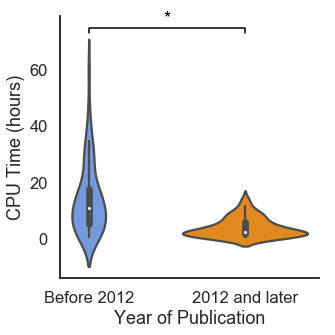

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp

clrs = ['cornflowerblue', 'darkorange', 'limegreen', 'crimson', 'plum', 'peru', 'aquamarine', 
        'pink', 'darkgrey', 'yellowgreen', 'lightcoral', 'gold']

mwu = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['year_split'] == 'Before 2012'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['year_split'] == '2012 and later'].loc[:,'runtime'],
                             alternative = 'greater')

sns.set_style('white')
sns.set_context('talk')
ax = sns.catplot(data = rtyear_new, x = 'year_split', y = 'runtime', kind = 'violin', 
                 order = ['Before 2012', '2012 and later'], palette=clrs)
ax.set(xlabel = 'Year of Publication', ylabel = 'CPU Time (hours)')
plt.plot([0,0,1,1], [73,75,75,73], lw = 1.5, c = 'k')
plt.text(.5, 75, '*', ha = 'center', va = 'bottom', color = 'k')
ax = sns.despine()
#plt.show()
plt.savefig('../figures/Runtime_by_Year.png')
plt.savefig('../figures/Runtime_by_Year.pdf')

print (mwu)

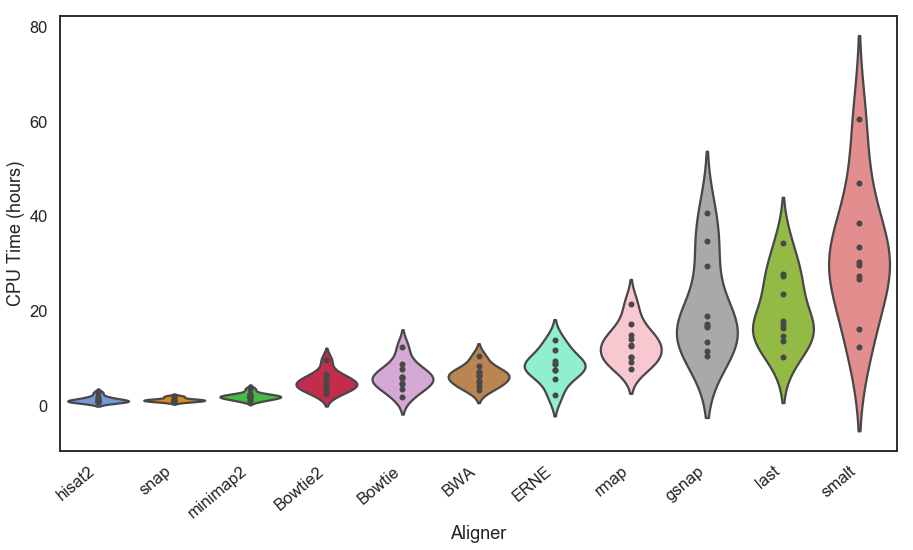

In [8]:
plt.figure(figsize=(15,8))
my_order = rtyear_new.groupby(by='Tools')[["runtime"]].median()
my_order = my_order.sort_values(by='runtime').index
ax = sns.violinplot(data = rtyear_new, x = 'Tools', y = 'runtime', scale='width', palette=clrs,
                   order = my_order, inner='points')
ax.set(xlabel = 'Aligner', ylabel = 'CPU Time (hours)')
ax.set_xticklabels(rotation=40, ha="right", labels=my_order)

#plt.show()
plt.savefig('../figures/Runtime_by_Tool.png')
plt.savefig('../figures/Runtime_by_Tool.pdf')

In [9]:
rtyear_new.groupby(['Tools']).mean()

,runtime
Tools,
BWA,6.239311
Bowtie,6.102213
Bowtie2,4.973137
ERNE,8.281991
gsnap,20.924469
hisat2,1.158713
last,20.221401
minimap2,1.866426
rmap,12.950420


In [10]:
rtyear_new.head()

,Tools,year_split,Application,Indexing,Global_Positioning,Pairwise_alignment,variable,runtime
0,Bowtie2,2012 and later,DNA,BWT-FM,Backward Search,NW,ERR009309,2.364914
1,Bowtie,Before 2012,DNA,BWT-FM,Backward Search,HD,ERR009309,3.358317
2,BWA,Before 2012,DNA,BWT-FM,Backward Search,SW,ERR009309,4.048227
3,ERNE,2012 and later,DNA,Hashing,Seed,HD,ERR009309,2.066056
4,gsnap,Before 2012,DNA,Hashing,Seed,Non-DP Heuristic,ERR009309,18.782465


MannwhitneyuResult(statistic=398.0, pvalue=1.6671599978645171e-06) 0.0009794833657616284


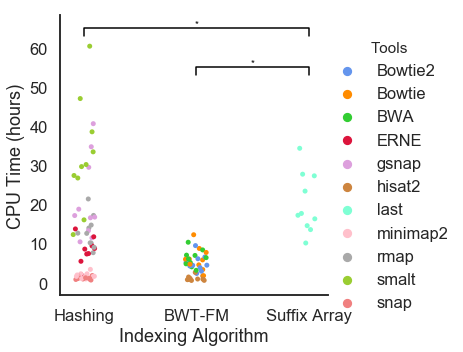

In [11]:
mwu = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Indexing'] == 'Suffix Array'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Indexing'] == 'BWT-FM'].loc[:,'runtime'],
                             alternative = 'two-sided')
mwu2 = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Indexing'] == 'BWT-FM'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Indexing'] == 'Hashing'].loc[:,'runtime'],
                             alternative = 'two-sided')
print(mwu,mwu2.pvalue)

ax = sns.catplot(data = rtyear_new, x = 'Indexing', y = 'runtime', order=['Hashing','BWT-FM','Suffix Array'], 
                 palette=clrs,hue='Tools')
plt.plot([1,1,2,2], [53,55,55,53], lw = 1.5, c = 'k')
plt.text(1.5, 55, '*', ha = 'center', va = 'bottom', color = 'k')
plt.plot([0,0,2,2], [63,65,65,63], lw = 1.5, c = 'k')
plt.text(1, 65, '*', ha = 'center', va = 'bottom', color = 'k')
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'CPU Time (hours)')
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'CPU Time (hours)')
#plt.show()
plt.savefig('../figures/Runtime_by_Index.png')
plt.savefig('../figures/Runtime_by_Index.pdf')

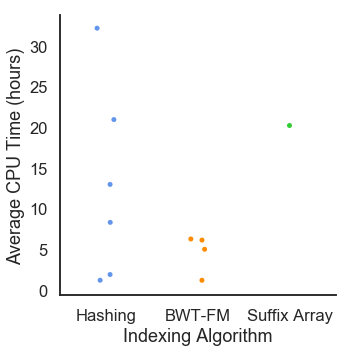

In [12]:
ax = sns.catplot(data = rtyear_summ, x = 'Indexing', y = 'average_runtime', order=['Hashing','BWT-FM','Suffix Array'], 
                 palette=clrs)
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Average CPU Time (hours)')
#plt.show()
plt.savefig('../figures/Runtime_by_Index_avg.png')
plt.savefig('../figures/Runtime_by_Index_avg.pdf')

MannwhitneyuResult(statistic=733.0, pvalue=3.451479784773805e-05)


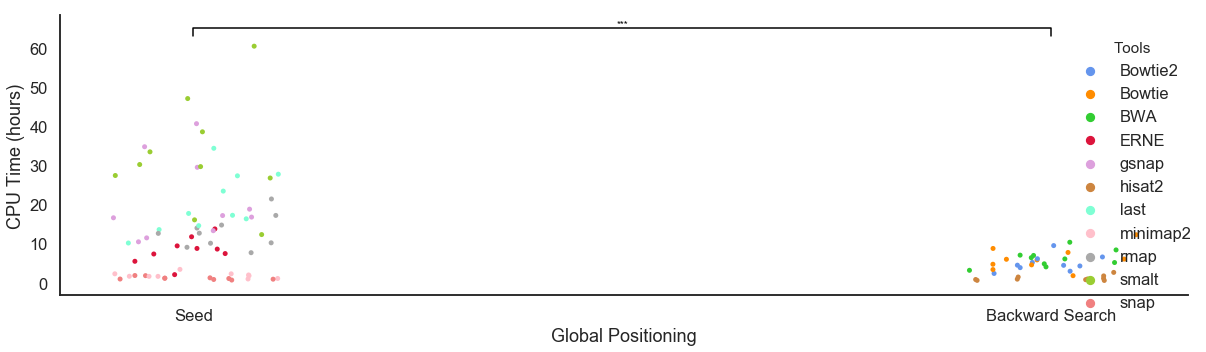

In [40]:
mwu = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Global_Positioning'] == 'Backward Search'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Global_Positioning'] == 'Seed'].loc[:,'runtime'],
                             alternative = 'two-sided')
print (mwu)
ax = sns.catplot(data = rtyear_new, x = 'Global_Positioning', y = 'runtime', order=['Seed','Backward Search'],
                palette=clrs,hue='Tools',aspect=3)
ax.set(xlabel = 'Global Positioning', ylabel = 'CPU Time (hours)')
plt.plot([0,0,1,1], [63,65,65,63], lw = 1.5, c = 'k')
plt.text(.5, 65, '***', ha = 'center', va = 'bottom', color = 'k')
#plt.show()
plt.tight_layout()
plt.savefig('../figures/Runtime_by_Global.png')
plt.savefig('../figures/Runtime_by_Global.pdf')

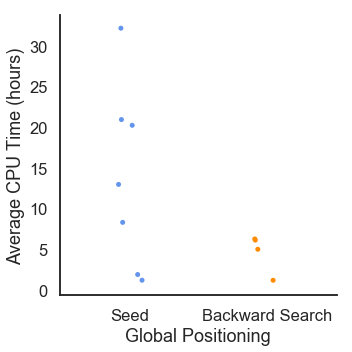

In [14]:
ax = sns.catplot(data = rtyear_summ, x = 'Global_Positioning', y = 'average_runtime', 
                 order=['Seed', 'Backward Search'], palette=clrs)
ax.set(xlabel = 'Global Positioning', ylabel = 'Average CPU Time (hours)')
#plt.show()
plt.tight_layout()
plt.savefig('../figures/Runtime_by_Global_avg.png')
plt.savefig('../figures/Runtime_by_Global_avg.pdf')

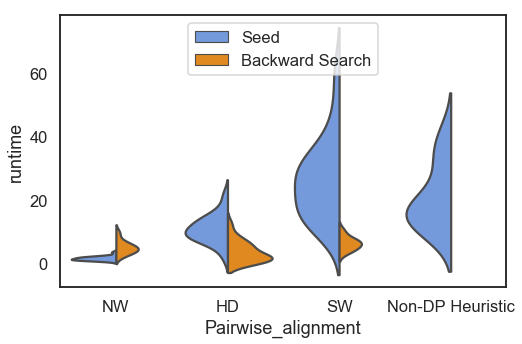

In [15]:
plt.figure(figsize=(8,5))
ax = sns.violinplot(data = rtyear_new, x = 'Pairwise_alignment', y = 'runtime', hue = 'Global_Positioning', 
                    split=True, scale='count', hue_order=['Seed','Backward Search'],
                    inner=None, palette=clrs)
plt.legend(loc='upper center')
plt.show()

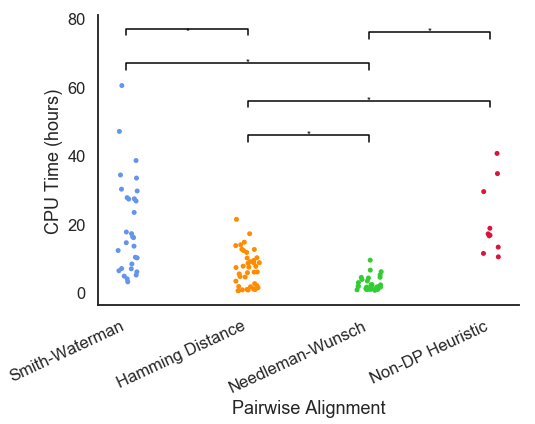

In [16]:
mwu1 = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'SW'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'HD'].loc[:,'runtime'],
                             alternative = 'greater')
mwu2 = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'HD'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'Non-DP Heuristic'].loc[:,'runtime'],
                             alternative = 'less')
mwu3 = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'NW'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'Non-DP Heuristic'].loc[:,'runtime'],
                             alternative = 'less')
mwu4 = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'SW'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'NW'].loc[:,'runtime'],
                             alternative = 'greater')
mwu5 = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'HD'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'NW'].loc[:,'runtime'],
                             alternative = 'two-sided')
#print(mwu5)
ax = sns.catplot(data = rtyear_new, x = 'Pairwise_alignment', y = 'runtime', 
                 order=['SW','HD','NW','Non-DP Heuristic'], palette=clrs, height=6, aspect=1.25)
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'CPU Time (hours)')
#plt.legend(title='Global Positioning', loc='center left', bbox_to_anchor=(1, .5))
ax.set_xticklabels(rotation=25, ha="right", labels=['Smith-Waterman','Hamming Distance','Needleman-Wunsch','Non-DP Heuristic'])
plt.plot([0,0,1,1], [75,77,77,75], lw = 1.5, c = 'k')
plt.text(.5, 75, '*', ha = 'center', va = 'bottom', color = 'k')
plt.plot([1,1,3,3], [54,56,56,54], lw = 1.5, c = 'k')
plt.text(2, 55, '*', ha = 'center', va = 'bottom', color = 'k')
plt.plot([2,2,3,3], [74,76,76,74], lw = 1.5, c = 'k')
plt.text(2.5, 75, '*', ha = 'center', va = 'bottom', color = 'k')
plt.plot([0,0,2,2], [65,67,67,65], lw = 1.5, c = 'k')
plt.text(1, 66, '*', ha = 'center', va = 'bottom', color = 'k')
plt.plot([1,1,2,2], [44,46,46,44], lw = 1.5, c = 'k')
plt.text(1.5, 45, '*', ha = 'center', va = 'bottom', color = 'k')
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Runtime_by_Local.png')
plt.savefig('../figures/Runtime_by_Local.pdf')



In [17]:
ax = sns.catplot(data = rtyear_summ, x = 'Pairwise_alignment_2', y = 'average_runtime', hue = 'Global_Positioning',
                hue_order=['Seed','Backward Search'],
                order=['Local','Hamming Distance','Global','Non-DP Heuristic','Local & Global'], palette=clrs)
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Average CPU Time (hours)')
ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=40, ha="right")
#plt.show()

#plt.savefig('../figures/Runtime_by_Local_avg.png')
#plt.savefig('../figures/Runtime_by_Local_avg.pdf')

ValueError: Could not interpret input 'Pairwise_alignment_2'

In [ ]:
ax = sns.catplot(data = rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'SW'], x = 'Global_Positioning', 
                y = 'runtime', hue = 'Indexing', hue_order=['Hashing','BWT-FM','Suffix Array'], 
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'CPU Time (hours)', title = 'Tools using Smith-Waterman Pairwise Alignment')

plt.savefig('../figures/Runtime_using_Local.png')
plt.savefig('../figures/Runtime_using_Local.pdf')

In [ ]:
ax = sns.catplot(data = rtyear_summ.loc[rtyear_summ['Pairwise_alignment'] == 'SW'], x = 'Global_Positioning', 
                y = 'average_runtime', hue = 'Indexing', hue_order=['Hashing','BWT-FM','Suffix Array'],
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Average CPU Time (hours)', title = 'Tools using Smith-Waterman Pairwise Alignment')

plt.savefig('../figures/Runtime_using_Local_avg.png')
plt.savefig('../figures/Runtime_using_Local_avg.pdf')


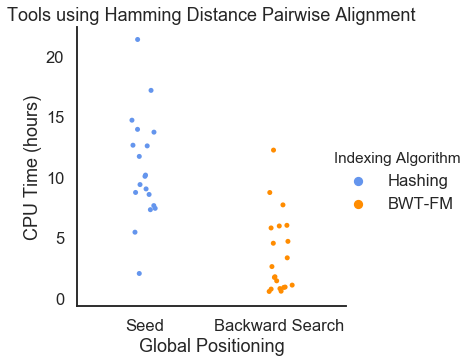

In [18]:
ax = sns.catplot(data = rtyear_new.loc[rtyear_new['Pairwise_alignment'] == 'HD'],
                 x = 'Global_Positioning', y = 'runtime', hue = 'Indexing', order=['Seed','Backward Search'],
                 hue_order=['Hashing','BWT-FM'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'CPU Time (hours)', title = 'Tools using Hamming Distance Pairwise Alignment')

plt.savefig('../figures/Runtime_using_HD.png')
plt.savefig('../figures/Runtime_using_HD.pdf')


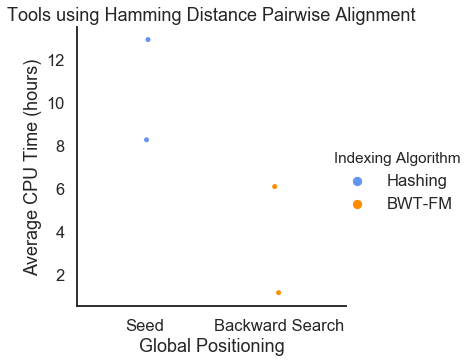

In [19]:
ax = sns.catplot(data = rtyear_summ.loc[rtyear_summ['Pairwise_alignment'] == 'HD'],
                 x = 'Global_Positioning', y = 'average_runtime', hue = 'Indexing', 
                 order=['Seed','Backward Search'], hue_order=['Hashing','BWT-FM'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Average CPU Time (hours)', title = 'Tools using Hamming Distance Pairwise Alignment')

plt.savefig('../figures/Runtime_using_HD_avg.png')
plt.savefig('../figures/Runtime_using_HD_avg.pdf')


In [20]:
test = rtyear_new.groupby(['Global_Positioning','Pairwise_alignment_2']).mean()
#test = rtyear_new.pivot(index = 'global_alignment_algorithm', columns = 'local', values = 'runtime')
test = test.unstack(level = -1)
test

KeyError: 'Pairwise_alignment_2'

MannwhitneyuResult(statistic=1856.0, pvalue=0.0023022768002438315)


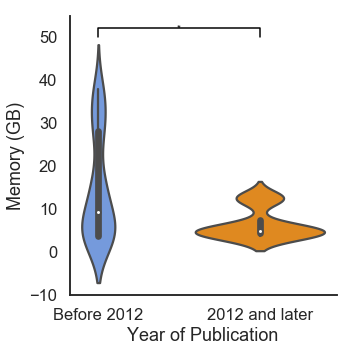

In [42]:
mwu = scp.stats.mannwhitneyu(memyear_new.loc[rtyear_new['year_split'] == 'Before 2012'].loc[:,'memory'], 
                              memyear_new.loc[rtyear_new['year_split'] == '2012 and later'].loc[:,'memory'],
                             alternative = 'greater')

ax = sns.catplot(data = memyear_new, x = 'year_split', y = 'memory', kind = 'violin', 
                 order = ['Before 2012', '2012 and later'], palette=clrs)
ax.set(xlabel = 'Year of Publication', ylabel = 'Memory (GB)')
plt.plot([0,0,1,1], [50,52,52,50], lw = 1.5, c = 'k')
plt.text(.5, 51, '*', ha = 'center', va = 'bottom', color = 'k')
#plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Year.png')
plt.savefig('../figures/Memory_by_Year.pdf')

print (mwu)

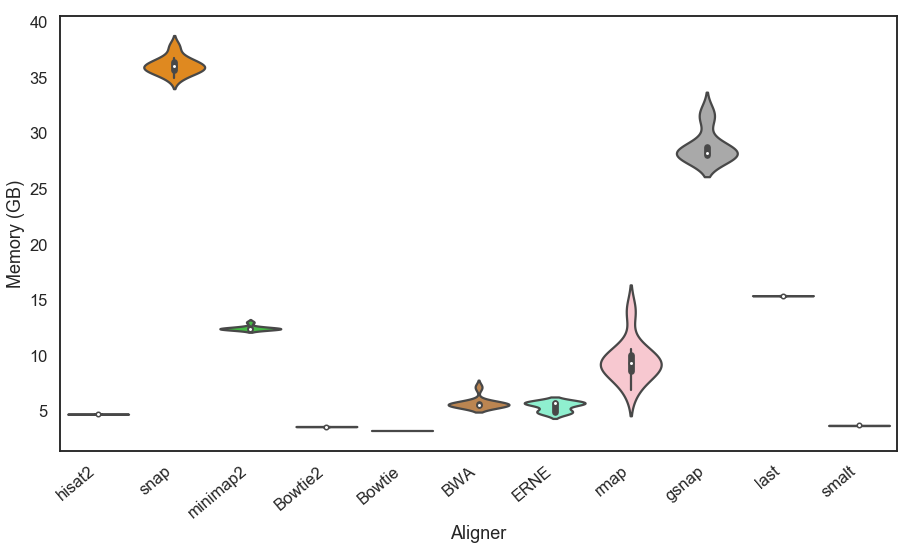

In [21]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(data = memyear_new, x = 'Tools', y = 'memory', scale='width', order=my_order, palette=clrs)
ax.set(xlabel = 'Aligner', ylabel = 'Memory (GB)')
ax.set_xticklabels(rotation=40, ha="right", labels=my_order)

#plt.show()
plt.savefig('../figures/Memory_by_Tool.png')
plt.savefig('../figures/Memory_by_Tool.pdf')

MannwhitneyuResult(statistic=247.0, pvalue=9.651734064536602e-12)


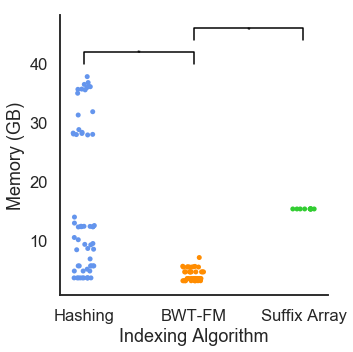

In [22]:
mwu1 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Indexing'] == 'BWT-FM'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Indexing'] == 'Suffix Array'].loc[:,'memory'],
                             alternative = 'less')

mwu2 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Indexing'] == 'BWT-FM'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Indexing'] == 'Hashing'].loc[:,'memory'],
                             alternative = 'less')
mwu3 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Indexing'] == 'Suffix Array'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Indexing'] == 'Hashing'].loc[:,'memory'],
                             alternative = 'two-sided')
print(mwu2)
ax = sns.catplot(data = memyear_new, x = 'Indexing', y = 'memory', order=['Hashing','BWT-FM','Suffix Array'],
                palette=clrs)
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Memory (GB)')

plt.plot([0,0,1,1], [40,42,42,40], lw = 1.5, c = 'k')
plt.text(.5, 41, '*', ha = 'center', va = 'bottom', color = 'k')
plt.plot([1,1,2,2], [44,46,46,44], lw = 1.5, c = 'k')
plt.text(1.5, 45, '*', ha = 'center', va = 'bottom', color = 'k')
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Index.png')
plt.savefig('../figures/Memory_by_Index.pdf')

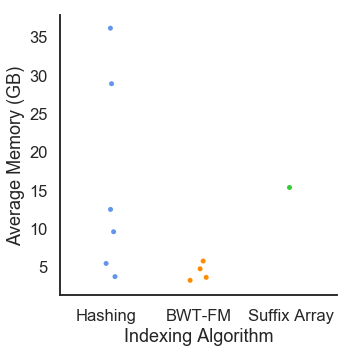

In [23]:
ax = sns.catplot(data = memyear_summ, x = 'Indexing', y = 'average_memory', 
                 order=['Hashing','BWT-FM','Suffix Array'], palette=clrs)
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Average Memory (GB)')
#plt.show()

plt.savefig('../figures/Memory_by_Index_avg.png')
plt.savefig('../figures/Memory_by_Index_avg.pdf')

MannwhitneyuResult(statistic=247.0, pvalue=3.771602589601175e-13)


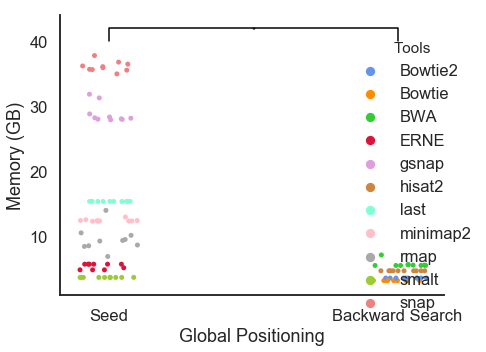

In [37]:
mwu = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Global_Positioning'] == 'Backward Search'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Global_Positioning'] == 'Seed'].loc[:,'memory'],
                             alternative = 'less')

print(mwu)
ax = sns.catplot(data = memyear_new, x = 'Global_Positioning', y = 'memory', order=['Seed','Backward Search'],
                palette=clrs,hue='Tools')
ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)')
plt.plot([0,0,1,1], [40,42,42,40], lw = 1.5, c = 'k')
plt.text(.5, 41, '*', ha = 'center', va = 'bottom', color = 'k')
#plt.show()
plt.tight_layout()

plt.savefig('../figures/Memory_by_Global.png')
plt.savefig('../figures/Memory_by_Global.pdf')

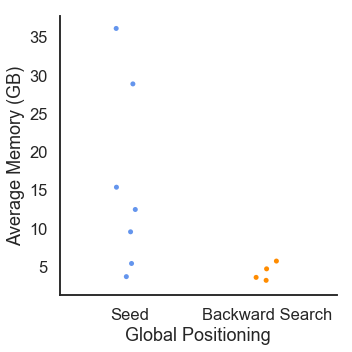

In [25]:
ax = sns.catplot(data = memyear_summ, x = 'Global_Positioning', y = 'average_memory', 
                 order=['Seed','Backward Search'], palette=clrs)
ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)')
#plt.show()
plt.savefig('../figures/Memory_by_Global_avg.png')
plt.savefig('../figures/Memory_by_Global_avg.pdf')

In [26]:
ax = sns.violinplot(data = memyear_new, x = 'Pairwise_alignment_2', y = 'memory', hue = 'Global_Positioning', 
                    split=True, scale='count', inner = None, hue_order=['Seed','Backward Search'],
                    order=['Local','Hamming Distance','Global','Non-DP Heuristic','Local & Global'],
                   palette=clrs)

ValueError: Could not interpret input 'Pairwise_alignment_2'

In [ ]:
mwu1 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Pairwise_alignment'] == 'SW'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Pairwise_alignment'] == 'Non-DP Heuristic'].loc[:,'memory'],
                             alternative = 'two-sided')
mwu2 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Pairwise_alignment'] == 'HD'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Pairwise_alignment'] == 'Non-DP Heuristic'].loc[:,'memory'],
                             alternative = 'two-sided')
mwu3 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Pairwise_alignment'] == 'HD'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Pairwise_alignment'] == 'NW'].loc[:,'memory'],
                             alternative = 'two-sided')
ax = sns.catplot(data = memyear_new, x = 'Pairwise_alignment', y = 'memory',
                    order=['SW','HD','NW','Non-DP Heuristic'],
                   palette=clrs, height=6, aspect=1.25)
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Memory (GB)')
#ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=25, ha="right", labels=['Smith-Waterman','Hamming Distance','Needleman-Wunsch',
                                                    'Non-DP Heuristic'])
plt.plot([0,0,3,3], [62,64,64,62], lw = 1.5, c = 'k')
plt.text(1.5, 63, '*', ha = 'center', va = 'bottom', color = 'k')
plt.plot([1,1,3,3], [54,56,56,54], lw = 1.5, c = 'k')
plt.text(2, 55, '*', ha = 'center', va = 'bottom', color = 'k')
plt.plot([1,1,2,2], [44,46,46,44], lw = 1.5, c = 'k')
plt.text(1.5, 45, '*', ha = 'center', va = 'bottom', color = 'k')
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Local.png')
plt.savefig('../figures/Memory_by_Local.pdf')

In [ ]:
ax = sns.catplot(data = memyear_summ, x = 'Pairwise_alignment', y = 'average_memory', hue = 'Global_Positioning',
                hue_order=['Seed','Backward Search'], 
                 order=['SW','HD','NW','Non-DP Heuristic'],
                palette=clrs)
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Average Memory (GB)')
ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=40, ha="right")
#plt.show()

plt.savefig('../figures/Memory_by_Local_avg.png')
plt.savefig('../figures/Memory_by_Local_avg.pdf')

In [ ]:
ax = sns.catplot(data = memyear_new.loc[memyear_new['Pairwise_alignment'] == 'SW'], x = 'Global_Positioning', 
                y = 'memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM','Suffix Array'],
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)', title = 'Tools using Smith-Waterman Pairwise Alignment')

plt.savefig('../figures/Memory_using_Local.png')
plt.savefig('../figures/Memory_using_Local.pdf')

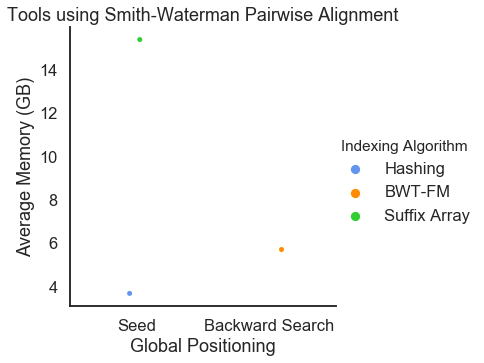

In [27]:
ax = sns.catplot(data = memyear_summ.loc[memyear_summ['Pairwise_alignment'] == 'SW'], x = 'Global_Positioning', 
                y = 'average_memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM','Suffix Array'], 
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)', title = 'Tools using Smith-Waterman Pairwise Alignment')

plt.savefig('../figures/Memory_using_Local_avg.png')
plt.savefig('../figures/Memory_using_Local_avg.pdf')

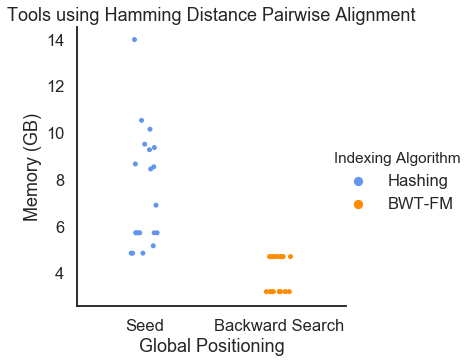

In [28]:
ax = sns.catplot(data = memyear_new.loc[memyear_new['Pairwise_alignment'] == 'HD'],
                 x = 'Global_Positioning', y = 'memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM'],
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)', title = 'Tools using Hamming Distance Pairwise Alignment')

plt.savefig('../figures/Memory_using_HD.png')
plt.savefig('../figures/Memory_using_HD.pdf')


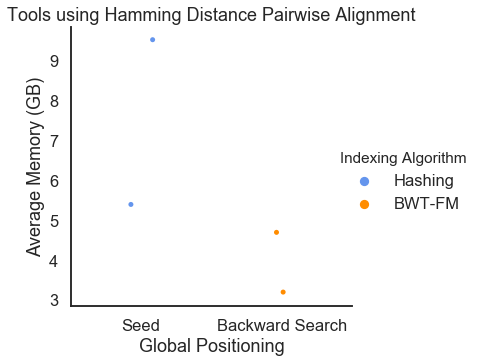

In [29]:
ax = sns.catplot(data = memyear_summ.loc[memyear_summ['Pairwise_alignment'] == 'HD'],
                 x = 'Global_Positioning', y = 'average_memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM'],
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)', title = 'Tools using Hamming Distance Pairwise Alignment')

plt.savefig('../figures/Memory_using_HD_avg.png')
plt.savefig('../figures/Memory_using_HD_avg.pdf')


In [30]:
test = memyear_new.groupby(['Global_Positioning','Pairwise_alignment_2']).mean()
#test = rtyear_new.pivot(index = 'global_alignment_algorithm', columns = 'local', values = 'runtime')
test = test.unstack(level = -1)
test

KeyError: 'Pairwise_alignment_2'

In [ ]:
#rtyear_summ.head()
#memyear_summ.head()
rtvm = pd.merge(rtyear_summ, memyear_summ, 
                on=['Tools','Year_of_publication','Application','Indexing','Global_Positioning','Pairwise_alignment'],
                how='inner')
rtvm.loc[:,'Global_Pairwise'] = rtvm.loc[:,'Global_Positioning'] + " + " + rtvm.loc[:,'Pairwise_alignment']
rtvm
ax = sns.scatterplot(data=rtvm, x = 'average_runtime', y = 'average_memory', hue='Global_Pairwise', 
                    hue_order=['Seed + SW','Seed + HD','Seed + NW','Seed + Non-DP Heuristic',
                               'Backward Search + SW','Backward Search + HD','Backward Search + NW'],
                    palette=clrs[0:7])
handles,labels = ax.get_legend_handles_labels()
ax.set(xlabel='Average CPU Time (Hours)', ylabel='Average Memory (GB)')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend.texts[0].set_text('Global Positioning + Pairwise Alignment')
#plt.show()

plt.savefig('../figures/Memory_vs_Runtime.png')
plt.savefig('../figures/Memory_vs_Runtime.pdf')


In [ ]:
data_index = data[['Aligner', 'Indexing', 'Application']]
data_index.loc[:,'aligner_lower'] = data_index.loc[:,'Aligner'].str.lower()
idx_rt.loc[:,'tools_lower'] = idx_rt.loc[:,'Tools'].str.lower()
rtidx = pd.merge(idx_rt, data_index, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtidx = rtidx.dropna()
rtidx = rtidx.loc[rtidx.loc[:,'Application'] != 'RNA-Seq']
t = pd.DatetimeIndex(rtidx.loc[:,'Runtime'])
rtidx.loc[:,'Runtime (minutes)'] = t.hour*60 + t.minute
rtidx

In [31]:
mwu1 = scp.stats.mannwhitneyu(rtidx.loc[rtidx['Indexing'] == 'BWT-FM'].loc[:,'Virtual Mem (G)'], 
                              rtidx.loc[rtidx['Indexing'] == 'Hashing'].loc[:,'Virtual Mem (G)'],
                             alternative = 'two-sided')
print(mwu1.pvalue)

mwu1 = scp.stats.mannwhitneyu(rtidx.loc[rtidx['Indexing'] == 'BWT-FM'].loc[:,'Runtime (minutes)'], 
                              rtidx.loc[rtidx['Indexing'] == 'Hashing'].loc[:,'Runtime (minutes)'],
                             alternative = 'two-sided')
print(mwu1.pvalue)

ax = sns.catplot(data = rtidx, x = 'Indexing', y = 'Runtime (minutes)', order=['Hashing','BWT-FM','Suffix Array'],
                palette=clrs)
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'CPU Time (minutes)')

plt.savefig('../figures/Indexing_by_Runtime.png')
plt.savefig('../figures/Indexing_by_Runtime.pdf')

NameError: name 'rtidx' is not defined

In [32]:
ax = sns.catplot(data = rtidx, x = 'Indexing', y = 'Virtual Mem (G)', order=['Hashing','BWT-FM','Suffix Array'],
                 palette=clrs)
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Memory (GB)')

plt.savefig('../figures/Indexing_by_Memory.png')
plt.savefig('../figures/Indexing_by_Memory.pdf')

NameError: name 'rtidx' is not defined

In [33]:
ax = sns.scatterplot(data=rtidx, x = 'Runtime (minutes)', y = 'Virtual Mem (G)', 
                    hue = 'Indexing', hue_order=['Hashing','BWT-FM','Suffix Array'], palette=clrs[0:3])
ax.set(xlabel = 'CPU Time (minutes)', ylabel = 'Memory (GB)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../figures/Indexing_Memory_vs_Runtime.png')
plt.savefig('../figures/Indexing_Memory_vs_Runtime.pdf')
#plt.show()

NameError: name 'rtidx' is not defined

In [34]:
tools = data.loc[:,['Aligner','Indexing','Global_Positioning','Pairwise_alignment',
                   'Pairwise_alignment (DP-based?)','fix length seed','Variable length seed (hybrid seeding)',
                   'spaced seed','chain_of_seeds']]
tools.head()

,Aligner,Indexing,Global_Positioning,Pairwise_alignment,Pairwise_alignment (DP-based?),fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds
0,Bismark,BWT-FM,Backward Search,HD,N,Y,N,N,N
1,BRAT,Hashing,Seed,HD,N,Y,N,N,N
2,BRAT-BW,BWT-FM,Backward Search,HD,N,N,Y,N,N
3,BS-Seeker,BWT-FM,Backward Search,HD,N,Y,N,N,N
4,BS-Seeker2,BWT-FM,Backward Search,SW & NW,Y,Y,N,N,N


In [35]:
tools.loc[:,'aligner_lower'] = data_year['Aligner'].str.lower()
seed_info = pd.merge(rtyear, tools, left_on='tools_lower', right_on='aligner_lower', how='inner')
seed_info = seed_info.loc[:,['Tools','ERR009309','ERR013127','ERR013138','ERR045708','ERR050158','ERR162843',
                             'ERR181410','ERR183377','SRR061640','SRR360549','Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds']]
seed_info

,Tools,ERR009309,ERR013127,ERR013138,ERR045708,ERR050158,ERR162843,ERR181410,ERR183377,SRR061640,SRR360549,Pairwise_alignment (DP-based?),fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds
0,Bowtie2,2.364914,4.442126,6.125343,9.481851,4.480202,6.579199,5.183426,4.279699,2.942086,3.852528,Y,Y,N,N,N
1,Bowtie,3.358317,5.825385,8.749844,12.251327,6.041617,7.729104,5.987389,4.563028,1.797393,4.718723,N,Y,N,N,N
2,BWA,4.048227,6.964193,8.374950,10.337639,5.155173,7.040740,6.394736,4.827655,3.171607,6.078192,Y,N,Y,N,N
3,ERNE,2.066056,5.475683,9.406134,13.734103,8.755687,NaN,11.730733,8.590035,7.333813,7.445680,N,Y,N,N,N
4,gsnap,18.782465,29.469896,40.606409,34.717148,11.450009,17.150793,16.579589,13.286443,10.444190,16.757750,N,Y,N,N,N
5,hisat2,0.582257,2.636554,1.459196,1.739013,0.778033,1.107651,0.944994,0.820202,0.604172,0.915061,N,Y,N,N,N
6,last,10.140177,16.316454,27.292700,27.709176,23.393876,34.322943,17.217662,14.567814,13.563960,17.689251,Y,N,Y,N,N
7,minimap2,0.955566,1.781175,3.408856,2.273320,1.625731,2.278983,1.980141,1.624609,1.086941,1.648935,Y,Y,N,N,N
8,rmap,7.669205,10.087773,14.721393,21.384636,13.965002,17.182582,12.655798,9.048157,10.189939,12.599718,N,Y,N,N,N
9,smalt,12.295481,26.736237,47.018981,60.391744,29.646617,38.529345,33.415141,27.376229,16.051896,30.176233,Y,Y,N,N,N


In [36]:
seed_all = pd.melt(seed_info, id_vars = ['Tools', 'Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
seed_all.head()

,Tools,Pairwise_alignment (DP-based?),fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds,variable,runtime
0,Bowtie2,Y,Y,N,N,N,ERR009309,2.364914
1,Bowtie,N,Y,N,N,N,ERR009309,3.358317
2,BWA,Y,N,Y,N,N,ERR009309,4.048227
3,ERNE,N,Y,N,N,N,ERR009309,2.066056
4,gsnap,N,Y,N,N,N,ERR009309,18.782465


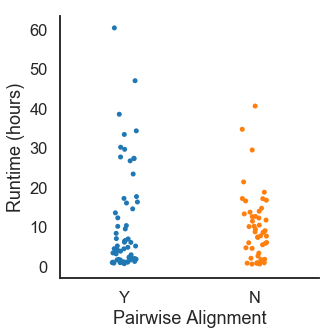

In [40]:
ax = sns.catplot(data = seed_all, x = 'Pairwise_alignment (DP-based?)', y = 'runtime')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Runtime (hours)')
plt.show()

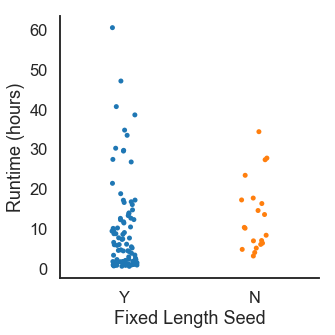

In [41]:
ax = sns.catplot(data = seed_all, x = 'fix length seed', y = 'runtime')
ax.set(xlabel = 'Fixed Length Seed', ylabel = 'Runtime (hours)')
plt.show()

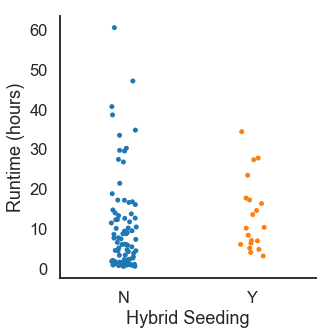

In [42]:
ax = sns.catplot(data = seed_all, x = 'Variable length seed (hybrid seeding)', y = 'runtime')
ax.set(xlabel = 'Hybrid Seeding', ylabel = 'Runtime (hours)')
plt.show()

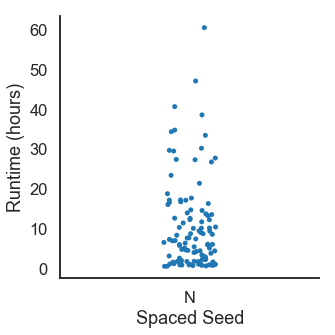

In [43]:
ax = sns.catplot(data = seed_all, x = 'spaced seed', y = 'runtime')
ax.set(xlabel = 'Spaced Seed', ylabel = 'Runtime (hours)')
plt.show()

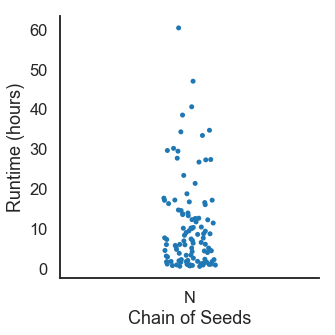

In [44]:
ax = sns.catplot(data = seed_all, x = 'chain_of_seeds', y = 'runtime')
ax.set(xlabel = 'Chain of Seeds', ylabel = 'Runtime (hours)')
plt.show()

In [45]:
seed_mem = pd.merge(memyear, tools, left_on='tools_lower', right_on='aligner_lower', how='inner')
seed_mem = seed_info.loc[:,['Tools','ERR009309','ERR013127','ERR013138','ERR045708','ERR050158','ERR162843',
                             'ERR181410','ERR183377','SRR061640','SRR360549','Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds']]
seed_mem

,Tools,ERR009309,ERR013127,ERR013138,ERR045708,ERR050158,ERR162843,ERR181410,ERR183377,SRR061640,SRR360549,Pairwise_alignment (DP-based?),fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds
0,Bowtie2,2.364914,4.442126,6.125343,9.481851,4.480202,6.579199,5.183426,4.279699,2.942086,3.852528,Y,Y,N,N,N
1,Bowtie,3.358317,5.825385,8.749844,12.251327,6.041617,7.729104,5.987389,4.563028,1.797393,4.718723,N,Y,N,N,N
2,BWA,4.048227,6.964193,8.374950,10.337639,5.155173,7.040740,6.394736,4.827655,3.171607,6.078192,Y,N,Y,N,N
3,ERNE,2.066056,5.475683,9.406134,13.734103,8.755687,NaN,11.730733,8.590035,7.333813,7.445680,N,Y,N,N,N
4,gsnap,18.782465,29.469896,40.606409,34.717148,11.450009,17.150793,16.579589,13.286443,10.444190,16.757750,N,Y,N,N,N
5,hisat2,0.582257,2.636554,1.459196,1.739013,0.778033,1.107651,0.944994,0.820202,0.604172,0.915061,N,Y,N,N,N
6,last,10.140177,16.316454,27.292700,27.709176,23.393876,34.322943,17.217662,14.567814,13.563960,17.689251,Y,N,Y,N,N
7,minimap2,0.955566,1.781175,3.408856,2.273320,1.625731,2.278983,1.980141,1.624609,1.086941,1.648935,Y,Y,N,N,N
8,rmap,7.669205,10.087773,14.721393,21.384636,13.965002,17.182582,12.655798,9.048157,10.189939,12.599718,N,Y,N,N,N
9,smalt,12.295481,26.736237,47.018981,60.391744,29.646617,38.529345,33.415141,27.376229,16.051896,30.176233,Y,Y,N,N,N


In [46]:
mem_all = pd.melt(seed_mem, id_vars = ['Tools', 'Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
mem_all.head()

,Tools,Pairwise_alignment (DP-based?),fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds,variable,memory
0,Bowtie2,Y,Y,N,N,N,ERR009309,2.364914
1,Bowtie,N,Y,N,N,N,ERR009309,3.358317
2,BWA,Y,N,Y,N,N,ERR009309,4.048227
3,ERNE,N,Y,N,N,N,ERR009309,2.066056
4,gsnap,N,Y,N,N,N,ERR009309,18.782465


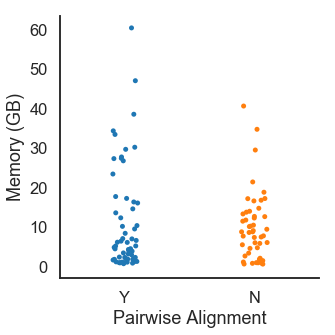

In [47]:
ax = sns.catplot(data = mem_all, x = 'Pairwise_alignment (DP-based?)', y = 'memory')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Memory (GB)')
plt.show()

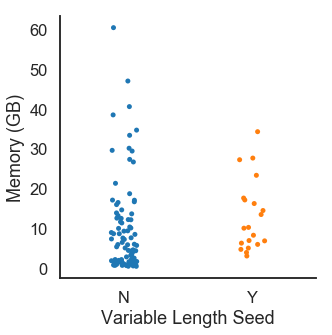

In [48]:
ax = sns.catplot(data = mem_all, x = 'Variable length seed (hybrid seeding)', y = 'memory')
ax.set(xlabel = 'Variable Length Seed', ylabel = 'Memory (GB)')
plt.show()

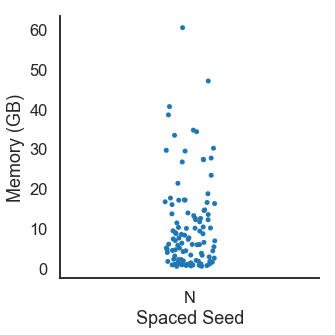

In [49]:
ax = sns.catplot(data = mem_all, x = 'spaced seed', y = 'memory')
ax.set(xlabel = 'Spaced Seed', ylabel = 'Memory (GB)')
plt.show()